In [1]:
import numpy as np
from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite
import dwave.inspector
import dimod
import importlib
from collections import defaultdict
import matplotlib.pyplot as plt

In [2]:
# alternative configuration with real data

means = np.load('means2.npy')
covs = np.load('covs2.npy').T
        
# number of marks
M = 5

# number of nucleosomes
N = 5

# independent propensity
h = defaultdict(int)
for n in range(N):
    for i in range(M):
        x = n * M + i
        h[x] = means[i]

# pair-wise correlation
J = defaultdict(int)
for n in range(N):
    for i in range(M):
        for j in range(i+1, M):
            x = n * M + i
            y = n * M + j
            J[(x, y)] = covs[i, j]  

print(h)
print(J)
print(covs[0, 1])

defaultdict(<class 'int'>, {0: 0.07407407407407407, 1: 0.1111111111111111, 2: 0.2222222222222222, 3: 0.48148148148148145, 4: 0.037037037037037035, 5: 0.07407407407407407, 6: 0.1111111111111111, 7: 0.2222222222222222, 8: 0.48148148148148145, 9: 0.037037037037037035, 10: 0.07407407407407407, 11: 0.1111111111111111, 12: 0.2222222222222222, 13: 0.48148148148148145, 14: 0.037037037037037035, 15: 0.07407407407407407, 16: 0.1111111111111111, 17: 0.2222222222222222, 18: 0.48148148148148145, 19: 0.037037037037037035, 20: 0.07407407407407407, 21: 0.1111111111111111, 22: 0.2222222222222222, 23: 0.48148148148148145, 24: 0.037037037037037035})
defaultdict(<class 'int'>, {(0, 1): 0.029914529914529878, (0, 2): 0.021367521367521385, (0, 3): 0.03988603988603992, (0, 4): -0.0028490028490028496, (1, 2): 0.01282051282051282, (1, 3): 0.059829059829059866, (1, 4): 0.03418803418803419, (2, 3): 0.08119658119658124, (2, 4): 0.02991452991452992, (3, 4): 0.019943019943019953, (5, 6): 0.029914529914529878, (5, 7)

In [3]:
n_binary_vars = M * N
print(n_binary_vars)

25


Encoding of $s_i^n$ to qubit register: counting variable $x = n \cdot M + i$.
So the register looks like this:
$\left[s_1^1, s_2^1, s_3^1, s_1^2, s_2^2, s_3^2, ...\right]$

In [4]:
h_max = max(h, key=h.get)
J_max = max(J, key=J.get)
print(h[h_max])
print(J[J_max])

0.48148148148148145
0.08119658119658124


In [6]:
use_qpu = True
if use_qpu:
    bqm = dimod.BQM.from_ising(h, J)
    sampler = EmbeddingComposite(DWaveSampler())#solver='Advantage2_prototype1.1'))
    response = sampler.sample(
      bqm,
      chain_strength=2,
      num_reads=10,
      annealing_time=20,
      label='CDF',
    )
    dwave.inspector.show(response)
elif True:
    response = dimod.ExactSolver().sample_ising(h, J)
else:
    response = dimod.IdentitySampler().sample_qubo(Q, initial_states=[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])


In [7]:
first_result = np.array(list(response.first.sample.values()))
first_result

array([-1,  1, -1, -1,  1, -1, -1, -1, -1, -1,  1, -1, -1, -1,  1, -1, -1,
       -1, -1,  1,  1,  1, -1, -1,  1], dtype=int8)

In [9]:
#first_result = np.array([1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

result_matrix = first_result.reshape(N, M).T

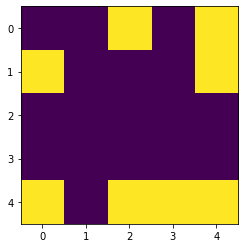

In [10]:
plt.figure()
plt.imshow(result_matrix)